# How do our data-structures scale?

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import functools, operator, random, itertools
from statistics import mean

import pyphi
from pyphi.examples import basic_noisy_selfloop_network
import pyphi.data_models as dm  # Prototype code

In [3]:
nn = list('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz') # for node names

N = 8 # number of Nodes in system
D = 4 # Degree; number of connections from a node to downstream nodes
S = 3 # number of States per node

labels = nn[:N]
nodes = [(l,S) for l in labels] # node (Label, NumStates)

print(f'''
{N} # number of Nodes
{D} # maximum number of Connections from a node
{S} # number of States per node
''')
# {labels} # node labels


8 # number of Nodes
4 # maximum number of Connections from a node
3 # number of States per node



In [4]:
G = nx.gnp_random_graph(N, .1, directed=True) # num_nodes, prob_edge
print(f'degree={mean([d for n,d in G.degree])}')
edges = list(G.edges())
# edges = [(0,1),(0,2),(1,3),(2,3),(3,0)]
print(f'edges={edges}')
net = dm.Net(edges=edges)

degree=1.75
edges=[(2, 0), (2, 7), (3, 5), (5, 0), (5, 7), (6, 1), (7, 3)]
n_list=[0, 1, 2, 3, 5, 6, 7]


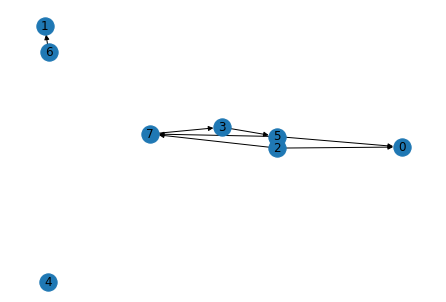

In [7]:
#Image(filename=png, width=500)
nx.draw(G,with_labels=True)

In [5]:
am = np.zeros((N,N))
cm = dm.CM(am=am, in_nodes=labels, out_nodes=labels)
cm

CM(7f57bc97fda): (8, 8) labels: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [6]:
# Create random associations from each node to C others
for r in labels: cm.df.loc[r,random.sample(labels,C)] = 1
for r in labels: cm.df.loc[r,r] = 0 # remove self edges
png=f'C_{C}.png'
G = cm.graph(pngfile=png)
cm.df

NameError: name 'C' is not defined

In [ ]:
p=np.random.random((S**N,S**N))
tp = dm.TransProb(in_nodes=nodes,out_nodes=nodes,probabilities=p)
tp.df  # state-to-state Transition Probabilities

In [ ]:
net = dm.Network(tp=tp, cm=cm)
print(net)